In [130]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [131]:
def tranform_to_centroids(X, clusters, centroids): # transform every pixel in X to it's centroid pixels 
    X_segmented = np.zeros(X.shape)
    for i in range(len(clusters)):
        X_segmented[i] = centroids[clusters[i]]
    
    return X_segmented

In [132]:
def segement_image_with_kmeans(img, num_colors):
    img = np.asarray(img) # convert image to array
    img_width = img.shape[0]
    img_height = img.shape[1]
    img_reshaped = np.reshape(img,(img_width*img_height,3))
    model = KMeans(n_clusters=num_colors, random_state=42)
    clusters = model.fit_predict(img_reshaped) 
    centroids = model.cluster_centers_
    
    X_segmented = tranform_to_centroids(img_reshaped, clusters, centroids)
    
    img_segmented = np.reshape(X_segmented,(img_width,img_height,3))
    return img_segmented

In [133]:
k_list = (10,8,6,4,2)

In [134]:
def print_images(original_image): # prints 2X3 plot of all segmented images
    rows = 2
    cols = 3
    axes=[]
    fig=plt.figure()
    
    # print the original image
    axes.append(fig.add_subplot(rows, cols,1))
    subplot_title=("Original Image")
    axes[-1].set_title(subplot_title)
    axes[-1].set_axis_off() # remove axis and ticks
    plt.imshow(original_image)
    
    # print segmented images
    for i in range(5): # k list length is 5
        img_segmented = segement_image_with_kmeans(original_image, k_list[i])
        image = Image.fromarray(img_segmented.astype(np.uint8)) # RGB image's pixels are in range 0-255

        axes.append(fig.add_subplot(rows, cols,i+2))
        subplot_title=(str(k_list[i])+" colors")
        axes[-1].set_title(subplot_title)
        axes[-1].set_axis_off()
        plt.imshow(image)

    fig.tight_layout()    
    plt.show()

Dog Image

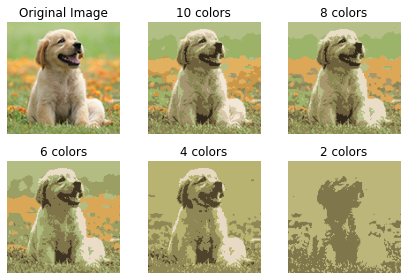

In [135]:
dog = Image.open('dog.png')
print_images(dog)

Beach Image

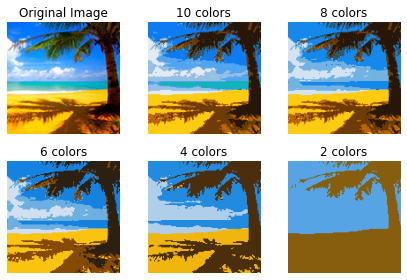

In [136]:
beach = Image.open('beach.png')
print_images(beach)

Ladybug Image

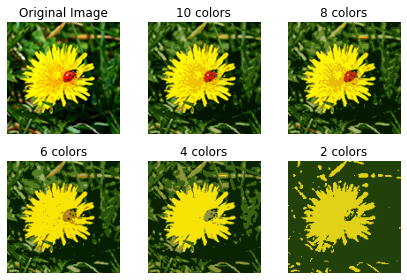

In [138]:
ladybug =  Image.open('ladybug.png')
print_images(ladybug)

Road Image

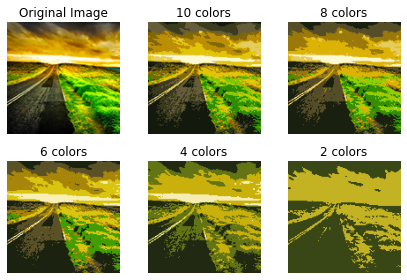

In [139]:
road =  Image.open('road.png')
print_images(road)